# Natural Language Processing - Sentiment Analysis
An example in a few of the steps of NLP. Specifically focused on Sentiment Analysis.

We will be working with a set of 100,000 Amazon reviews.

pip install ipykernel nltk pandas seaborn

## 1. Import Libraries

In [1]:
import pandas as pd
import nltk
from nltk.probability import FreqDist
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/stefanperkovic/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/stefanperkovic/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/stefanperkovic/nltk_data...


True

## 2. Data Loading and Understanding

In [3]:
df = pd.read_csv("data/reviews.csv")

In [4]:
df.shape

(100000, 10)

## 3. Minimal Exploratory Data Analysis

In [6]:
df.columns
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,238216,B002JVPFZ8,A1B563ESLJ4EAU,Matthew Carney,2,2,5,1258416000,love 'em!,Someone gave me half a pack several years ago....
1,1392,B00068PCTU,A1WVOM1UQU9ZN0,carola whitlow,0,0,5,1340496000,The World's Best Sweetener,Stevia is pretty much the only natural zero-ca...
2,495917,B004UBCJ5Y,A1PDFBS64JCPQC,AC,0,1,1,1334620800,Taste Like Movie Popcorn,Thinking these would be good for an upcoming b...
3,449823,B000E8PZNA,A2FX2RPCHQ1P41,"M. Coggin ""Clean Life""",6,6,5,1194912000,"Excellent tea with different, full flavor","The six pack is a good value, really no more t..."
4,530212,B003NC749C,A2GCRABUU8351C,MommaG,1,2,2,1285632000,Too bland.,Flavor is too subtle. I found myself putting ...


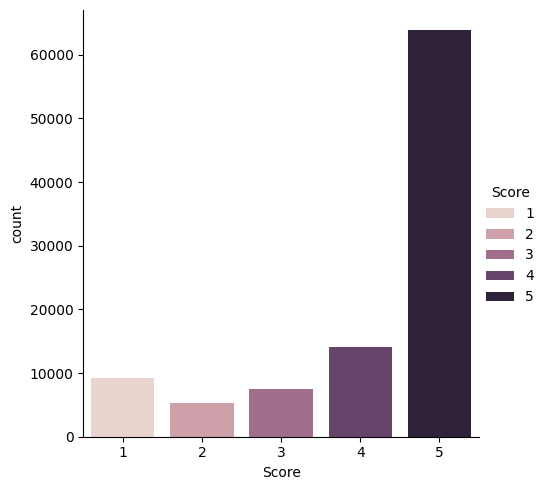

In [8]:
# How many of each rating there are
ax = sns.catplot(data=df, x='Score', kind="count", hue='Score')
plt.show()

## 4. Example Text Pre-Processing

### Tokenization
Breaking the text into sentences, phrases, words, and symbols.

In [10]:
# Get a random review
review = df["Text"][50]
review

# TOkenize using nltk
tokens = nltk.word_tokenize(review)

# Display the first 10 tokens
tokens[:10]

['My',
 'little',
 'dog',
 'loves',
 'these',
 'treats',
 '.',
 'Besides',
 'rewarding',
 'my']

### Frequency Distribution

In [13]:
fdist = FreqDist(tokens)
fdist

# top 10 words
fdist.most_common(10)

[('.', 3),
 ('dog', 2),
 ('treats', 2),
 ('My', 1),
 ('little', 1),
 ('loves', 1),
 ('these', 1),
 ('Besides', 1),
 ('rewarding', 1),
 ('my', 1)]

### Stemming
Cutting off the ends of the words to get some type of root

In [20]:
# Stemming - cuts off the ends of a word
lst = LancasterStemmer()

print("giving: ", lst.stem("giving"))
print("better: ", lst.stem("better"))
print("giving: ", lst.stem("giving"))



giving:  giv
better:  bet
giving:  giv


### Lemmatization
Determining the roots of words

In [18]:
# Lemmatizing - helps find the root of a word
lmt = WordNetLemmatizer()

print("better:", lmt.lemmatize("better", pos="a"))
print("alumni:", lmt.lemmatize("alumni"))

better: good
alumni: alumnus


### Part of Speech Tagging

In [19]:
tagged = nltk.pos_tag(tokens)

# Displays the first 10
tagged[:10]

[('My', 'PRP$'),
 ('little', 'JJ'),
 ('dog', 'JJ'),
 ('loves', 'VBZ'),
 ('these', 'DT'),
 ('treats', 'NNS'),
 ('.', '.'),
 ('Besides', 'IN'),
 ('rewarding', 'VBG'),
 ('my', 'PRP$')]

## 5. Sentiment Analysis

In [21]:
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()

In [32]:
sia.polarity_scores("I am so happy!")


{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [33]:
# Get just a 100 reviews to make it simple
df1 = df.sample(100)

In [34]:
# Return the sentiment score of each review
def get_polarity_scores(review):
    scores = sia.polarity_scores(review)
    return scores["neg"], scores["pos"], scores["neu"], scores["compound"]

# Apply polarity scoring function and save scores into separate columns
df1[['Negative', 'Positive', 'Neutral', 'Compound']] = df1['Text'].apply(lambda x: pd.Series(get_polarity_scores(x)))

In [35]:
df1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Negative,Positive,Neutral,Compound
25843,508754,B002T5TMWG,A2XKJ1KX6XUHYP,NYFB,7,10,1,1292457600,Not as firm as LA SIRENA...,Majority of the cans are lined in plastic and ...,0.083,0.093,0.823,0.1453
30150,160466,B00503DOY6,ACZ4YTYID1ESD,"Mona Johnson ""Rosie""",1,1,5,1336176000,Awesome!,"These are exceptional ""whenever"" bars! I keep...",0.000,0.208,0.792,0.9133
14967,79562,B003TNANSO,A4UNLGM6VM5Z1,YellowBird,2,2,5,1279670400,Best protein/snack bar I've found,Discovered KIND bars at a roadside rest area a...,0.056,0.268,0.677,0.9438
59931,284095,B0051COPH6,AQSW6WDVCJGB8,Teetee,0,0,5,1336867200,Baby loves it and his tummy takes it well!,My infant loves it! Juicy Pear and Garden Gre...,0.055,0.212,0.733,0.9918
93402,508323,B001PQNV6S,A137CU956U8KWF,J,0,0,5,1263254400,"Gluten free, really? They taste AMAZING!!",Finding gluten free products that taste decent...,0.023,0.312,0.665,0.9951


## 6. Visualization

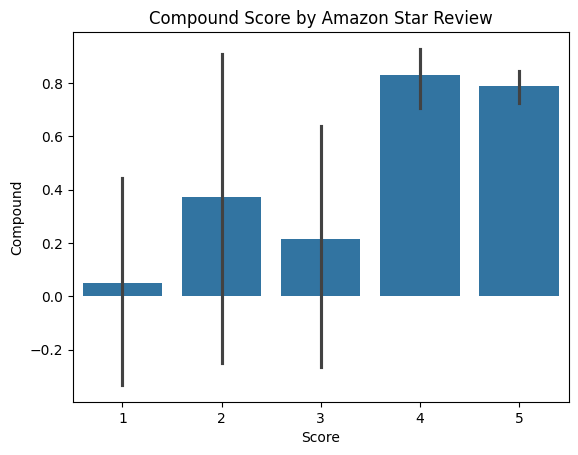

In [36]:
# Graph it
ax = sns.barplot(data=df1, x='Score', y='Compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()